# Clusterization

## 1. Texts Separation

In [1]:
path = "../../../Texts/text2_3.txt" 

In [3]:
from clusterization import text_segmentation
handle = open(path, 'r')
text = handle.read()
handle.close()
new = text_segmentation(text)
new

[[(0,
   ' А когда речь заходит о покупке авто на вторичном рынке, то ещё и опасное.'),
  (0, ' Ведь подержанный автомобиль – это всегда «кот в мешке».'),
  (1,
   ' Вопреки описанию и виду, можно «напороться» и на технически неисправную машину, и на битую-перебитую, а порой и на «криминальную».'),
  (1,
   ' Однако добрую часть вариантов можно отсеять ещё на этапе просмотра объявлений, нужно только быть внимательным.')],
 [[(0, ''),
   (1, ' Грамотно составляйте запрос поиска\n'),
   (1,
    'Для того чтобы не тратить время и силы, нужно максимально точно определиться с тем, что, собственно, необходимо приобрести и сколько на покупку имеется денег.')]],
 [(0, ' Если нужен седан, значит, выбираете только седан.'),
  (0,
   ' Если нужна механическая коробка, в условиях поиска ставите «только МКП».'),
  (1,
   ' В идеале, конечно, к моменту составления запроса нужно четко представлять, автомобиль какой марки и модели предполагается к покупке.'),
  (0,
   ' Нужен Рено Логан, значит, смотр

## 2. Experiments With Semantic

In [13]:
import os
import numpy as np
import time
import pickle
from scipy.linalg import block_diag

In [10]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('../../model.bin', binary=True) 
#model.init_sims(replace=True)

/home/ased/anaconda3/lib/python3.5/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### 2.1. Trivial Segmentation On Segmented From Programm

In [4]:
import pickle
with open('data_dict.pickle', 'rb') as f:
    data_dict = pickle.load(f)
    f.close()

In [5]:
from clusterization import trivial_segmentation

list_texts, TT, list_tag_ud = trivial_segmentation(path, model,data_dict)

/home/ased/Desktop/PROJECTS/SearchScript/SemanticAnalysis/Experiments/TextsClusters/clusterization.py:91: RuntimeWarning: invalid value encountered in true_divide
  return s/k


In [6]:
for i in list_texts:
    print(i, '\n')

 А когда речь заходит о покупке авто на вторичном рынке, то ещё и опасное. Ведь подержанный автомобиль – это всегда «кот в мешке». Вопреки описанию и виду, можно «напороться» и на технически неисправную машину, и на битую-перебитую, а порой и на «криминальную». 

 Однако добрую часть вариантов можно отсеять ещё на этапе просмотра объявлений, нужно только быть внимательным. 

 Грамотно составляйте запрос поиска
 

Для того чтобы не тратить время и силы, нужно максимально точно определиться с тем, что, собственно, необходимо приобрести и сколько на покупку имеется денег. 

 Если нужен седан, значит, выбираете только седан. 

 Если нужна механическая коробка, в условиях поиска ставите «только МКП». 

 В идеале, конечно, к моменту составления запроса нужно четко представлять, автомобиль какой марки и модели предполагается к покупке. Нужен Рено Логан, значит, смотрим Рено Логан, а не Clio Symbol, Sandero и Polo Sedan до кучи. 

 Имейте в виду, что даже самый «замечательный» б/у автомобиль п

In [7]:
new = list()
for i in list_tag_ud:
    _ = list()
    for j in i:
        _ += j
    new.append(_)
list_tag_ud = new

### 2.2. Union Of Segments

You can see that each segment is linked by one sence and has not some excess sentences. But there are segmentes that should be united. An example of such pairs is the pair of the first and second segments. It is one script step that can be named 'Request Generation'.

In [12]:
n  =lambda x: x/np.linalg.norm(x)
D = [(np.dot(n(i),n(TT[ind+1])), list_texts[ind], list_texts[ind+1]) for ind, i in enumerate(TT[:-1])]
D

[(0.40979059331933704,
  ' А когда речь заходит о покупке авто на вторичном рынке, то ещё и опасное. Ведь подержанный автомобиль – это всегда «кот в мешке». Вопреки описанию и виду, можно «напороться» и на технически неисправную машину, и на битую-перебитую, а порой и на «криминальную».',
  ' Однако добрую часть вариантов можно отсеять ещё на этапе просмотра объявлений, нужно только быть внимательным.'),
 (0.4486518585048985,
  ' Однако добрую часть вариантов можно отсеять ещё на этапе просмотра объявлений, нужно только быть внимательным.',
  ' Грамотно составляйте запрос поиска\n'),
 (0.5202380094788169,
  ' Грамотно составляйте запрос поиска\n',
  'Для того чтобы не тратить время и силы, нужно максимально точно определиться с тем, что, собственно, необходимо приобрести и сколько на покупку имеется денег.'),
 (0.5229061644006359,
  'Для того чтобы не тратить время и силы, нужно максимально точно определиться с тем, что, собственно, необходимо приобрести и сколько на покупку имеется де

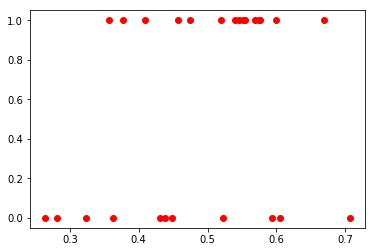

In [13]:
marks =[1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,0,0,1,1, ]
x = [i[0] for i in D]
for ind, i in enumerate(x):
    if np.isnan([i]).any():
        x[ind] = max(x)
import matplotlib.pyplot as plt
% matplotlib inline
plt.plot(x, marks, 'ro')

In such classification we can see that there is some spread of classes on segment [0.45,0.60]. The optimal bound is equal to 0.455.

## 3. Classification

In [14]:
import pickle
with open('MarkedTexts.pickle', 'rb') as f:
    d = pickle.load(f)
    f.close

In [15]:
def update(elem, model = model):
    s = np.zeros((300,))
    for i in elem[3]:
        for j in i:
            if type(j) == type(list()):
                for k in j:
                    if model.__contains__(k):
                        s+= model[k]
            else:
                if model.__contains__(j):
                    s+= model[j]
    return (elem[0], s/np.linalg.norm(s), elem[2])
new_d  =list()
for i in d:
    cur = list()
    for j in i:
        cur.append(update(j))
    new_d.append(cur)
d = new_d

In [16]:
import numpy as np
data = list()
for i in d:
    data += i
data_dict = dict()
for i in data:
    if data_dict.__contains__(i[2]):
        data_dict[int(i[2])] += 1
    else:
        data_dict[int(i[2])] = 1
_ = [key for key in data_dict if data_dict[key]<6] + [12]
data_copy = data.copy()
data = [(i[0],i[1],int(i[2])) for i in data if not int(i[2]) in _]
size_train = 0.8
print('Distribution', data_dict)
print('Ignore List', _)
print('Size data', len(data))
print('Size train',size_train)

Distribution {0: 12, 1: 6, 2: 16, 3: 15, 4: 33, 5: 9, 6: 22, 7: 224, 8: 25, 9: 17, 10: 1, 11: 8, 12: 96}
Ignore List [10, 12]
Size data 387
Size train 0.8


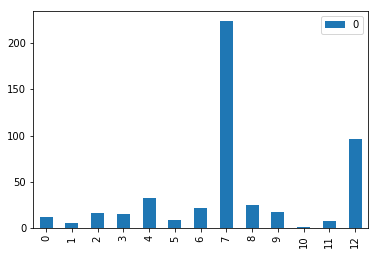

In [17]:
import pandas
%matplotlib inline
from collections import Counter
df = pandas.DataFrame.from_dict(data_dict, orient='index')
df.plot(kind='bar')

#### Distances Distribution

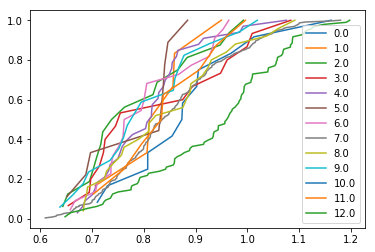

In [76]:
vectors = [i[1] for i in data_copy]
center = sum(vectors)/len(vectors)
new = dict()
for i in data_copy:
    if new.__contains__(i[2]):
        new[i[2]].append(i[1])
    else:
        new[i[2]] = [i[1]]
distances = {key:[np.linalg.norm(center-i) for i in new[key]] for key in new}
keys = new.keys()
import matplotlib.pyplot as plt
%matplotlib inline
for key in keys:
    distances[key].sort()
    y = [(ind+1)/len(distances[key]) for ind, i in enumerate(distances[key])]
    plt.plot(distances[key], y)
plt.legend(keys)
plt.show()

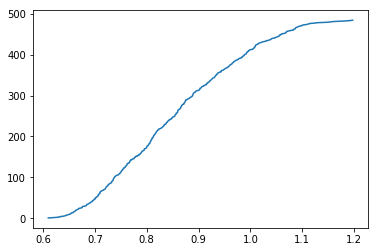

In [77]:
vectors = [i[1] for i in data_copy]
center = sum(vectors)/len(vectors)
distances = [np.linalg.norm(center-i) for i in vectors]
distances.sort()
y = [ind+1 for ind,i in enumerate(distances)]
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(distances, y)
plt.show()

#### Visualisation

E0911 20:19:38.409354 140626738186048 interactiveshell.py:2065] Line magic function `%matplotlin` not found.


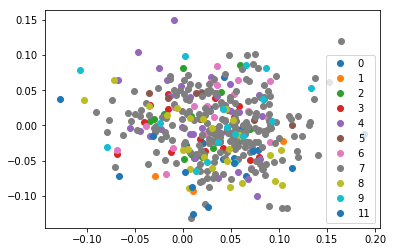

In [78]:
from sklearn.decomposition import PCA
X = np.array([i[1] for i in data])
Y = [int(i[2]) for i in data]
classes = list({int(i):None for i in Y}.keys())
pca = PCA(n_components = 2)
X_new = pca.fit_transform(X)
import matplotlib.pyplot as plt
%matplotlin inline
for cur in classes:
    plt.plot([X[ind,0] for ind,i in enumerate(Y) if i==cur],
             [X[ind,1] for ind,i in enumerate(Y) if i==cur], 'o')
plt.legend(classes)
plt.show()

### 3.1. Trivial Classification

In current section we will determine class of text on the nearest center of class that was got from training data.

In [18]:
import random
def trivial(train, test):
    data_dict = dict()
    for i in train:
        if data_dict.__contains__(i[2]):
            data_dict[int(i[2])].append(i[1])
        else:
            data_dict[int(i[2])] = [i[1]]
    centers = {i:sum(data_dict[i])/len(data_dict[i]) for i in data_dict}
    answers = list()
    for i in test:
        _ = {j:np.linalg.norm(centers[j]-i[1]) for j in centers}
        answer = None
        for key in _.keys():
            if answer is None or _[answer]>_[key]:
                answer = key
        answers.append(answer)
    return answers

In [19]:
def get_sets(data, size_train, all_data):
    res = {}
    for i in data:
        if res.__contains__(i[2]):
            res[i[2]].append(i)
        else:
            res[i[2]] = [i]
    train = list()
    for i in res:
        cur = int(size_train*len(res[i]))
        train+=res[i][:cur]
    test=list()
    if all_data:
        for i in res:
            test+=res[i]
    else:
        for i in res:
            cur = int(size_train*len(res[i]))
            test+=res[i][cur:]
    return train,test

In [20]:
def metric(results, arg = 13):
    D = np.zeros((arg, arg))
    def update(some_dict, key):
        if some_dict.__contains__(key):
            some_dict[key] += 1
        else:
            some_dict[key]=1
    TP, FP, FN = {}, {}, {}
    acc = 0
    _ = dict()
    for i in results:
        D[i[0], i[1]] += 1
        if i[0]==i[1]:
            acc+=1
        _[i[0]] = None
        _[i[1]] = None
        if i[0]==i[1]:
            update(TP, i[1])
        else:
            update(FP, i[1])
            update(FN, i[0])
    for i in _.keys():
        if not TP.__contains__(i):
            TP[i]=0
        if not FP.__contains__(i):
            FP[i]=0
        if not FN.__contains__(i):
            FN[i]=0
    precision, recall = {}, {}
    for i in _.keys():
        try:
            precision[i] = TP[i]/(TP[i]+FP[i])
        except Exception:
            precision[i]=0
        try:
            recall[i] = TP[i]/(TP[i]+FN[i])
        except Exception:
            recall[i]=0
    return precision, recall, acc/len(results), D
            
def test_method(data, size_train,repeat,classificator=trivial, arg = 13, all_data = False):
    prec, recall, acc = dict(), dict(), 0
    D = np.zeros((arg,arg))
    for i in range(repeat):
        shuffled_data=data.copy()
        random.shuffle(shuffled_data)
        train, test = get_sets(shuffled_data, size_train, all_data)
        answers = classificator(train, test)
        results = [(i[2], answers[ind]) for ind,i in enumerate(test)]
        cur_prec, cur_recall, cur_acc, cur_D = metric(results, arg)
        for i in cur_prec:
            if prec.__contains__(i):
                prec[i]+=(cur_prec[i]/repeat)
            else:
                prec[i]=cur_prec[i]/repeat
        for i in cur_recall:
            if recall.__contains__(i):
                recall[i]+=(cur_recall[i]/repeat)
            else:
                recall[i]=cur_recall[i]/repeat
        acc+=(cur_acc/repeat)
        D += cur_D/repeat
    return prec, recall, acc, D

#### Results On Tested Data

In [21]:
prec, recall, acc, D = test_method(data, size_train, 1000)
print('Accuracy', acc)
keys = list(prec.keys())
keys.sort()
print('Key\tPrec\tRecall')
mean_prec, mean_recall = 0, 0
for key in keys:
    mean_prec += prec[key]
    mean_recall += recall[key]
    print("%.f\t%.2f\t%.2f"%(key, prec[key],recall[key]))
print("Mean\t%.2f\t%.2f"%(mean_prec/len(keys), mean_recall/len(keys)))

Accuracy 0.5099878048780488
Key	Prec	Recall
0	0.20	0.25
1	0.00	0.00
2	0.32	0.41
3	0.20	0.39
4	0.46	0.41
5	0.02	0.04
6	0.31	0.37
7	0.91	0.61
8	0.25	0.53
9	0.34	0.43
11	0.72	0.84
Mean	0.34	0.39


In [15]:
D = D[keys].T[keys].T
import pandas as pd
pd.DataFrame(D,
            columns = keys,
            index = keys)

,0,1,2,3,4,5,6,7,8,9,11
0,0.447,0.524,0.126,0.355,0.038,0.405,0.042,0.453,0.008,0.594,0.008
1,0.550,0.000,0.585,0.385,0.020,0.027,0.049,0.282,0.000,0.070,0.032
2,0.024,0.162,1.646,0.308,0.127,0.697,0.083,0.267,0.000,0.440,0.246
3,0.030,0.035,0.042,1.391,0.358,0.202,0.353,0.422,0.000,0.167,0.000
4,0.073,0.078,0.088,1.291,2.866,0.328,1.293,0.856,0.094,0.033,0.000
5,0.026,0.033,0.412,0.271,0.045,0.114,0.894,0.162,0.000,0.043,0.000
6,0.101,0.057,0.177,0.720,0.800,1.208,1.725,0.004,0.000,0.208,0.000
7,0.438,0.560,0.643,3.219,2.385,1.259,0.686,28.990,5.375,1.098,0.347
8,0.156,0.006,0.183,0.202,0.082,0.075,0.067,1.874,2.059,0.296,0.000
9,0.318,0.021,0.724,0.448,0.022,0.247,0.007,0.122,0.177,1.903,0.011


### 3.2. Classification: SVM

In [22]:
def get_sets1(data, size_train, N_blocks):
    def mysplit(some_list, N):
        l = len(some_list)
        k, m = l//N, l%N
        lengths = [k+1 for i in range(m)]+[k for i in range(N-m)]
        cur = 0
        res = list()
        for i in lengths:
            res.append(some_list[cur:cur+i])
            cur+=i
        return res
    res = {}
    for i in data:
        if res.__contains__(i[2]):
            res[i[2]].append(i)
        else:
            res[i[2]] = [i]
    train = list()
    for i in res:
        cur = int(size_train*len(res[i]))
        train+=res[i][:cur]
    test=list()
    for i in res:
        cur = int(size_train*len(res[i]))
        test+=res[i][cur:]
    random.shuffle(train)
    return mysplit(train, N_blocks),test

In [127]:
X = np.array([i[1] for i in data])
Y = [int(i[2]) for i in data]
classes = list({int(i):None for i in Y}.keys())
transformed_data = [(None, i, Y[ind]) for ind,i in enumerate(X)]
import random
random.shuffle(transformed_data)
blocks, test =get_sets1(transformed_data, 0.8, 10)

In [128]:
from sklearn import svm
repeat = len(blocks)
res = dict()
for ind,b in enumerate(blocks):
    train, _, cur_test = list(), [j for cur_ind, j in enumerate(blocks) if cur_ind!=ind], b
    for j in _:
        train += j
    for j in range(1, 10):
        clf = svm.SVC(gamma = 3, degree = 1, coef0 =j,kernel='poly')
        # clf = svm.SVC(gamma = j, kernel='rbf')# 0.6919
        # clf = svm.SVC(gamma = 4, coef0 = j, kernel='sigmoid')
        X = np.array([i[1] for i in train])
        clf.fit(X, np.array([i[2] for i in train]))
        if res.__contains__(j):
            X = np.array([i[1] for i in cur_test])
            res[j] += clf.score(X, np.array([i[2] for i in cur_test]))
        else:
            X = np.array([i[1] for i in cur_test])
            res[j] = clf.score(X, np.array([i[2] for i in cur_test]))
res = {i:res[i]/repeat for i in res}
keys = list(res.keys())
keys.sort()
for i in keys:
    print(i, res[i])

1 0.6855913978494624
2 0.6855913978494624
3 0.6855913978494624
4 0.6855913978494624
5 0.6855913978494624
6 0.6855913978494624
7 0.6855913978494624
8 0.6855913978494624
9 0.6855913978494624


In [130]:
from sklearn import svm
clf = svm.SVC(gamma = 3, degree = 1, coef0 = 2.5,kernel='poly')

train = list()
for i in blocks:
    train += i
clf.fit(np.array([i[1] for i in train]), np.array([i[2] for i in train]))
pred = clf.predict(np.array([i[1] for i in test]))
results = [(i[2], pred[ind]) for ind,i in enumerate(test)]
prec, recall, acc, cur_D = metric(results)
print('Accuracy', acc)
keys = classes
keys.sort()
print('Key\tPrec\tRecall')
mean_prec, mean_recall = 0, 0
for key in keys:
    mean_prec += prec[key]
    mean_recall += recall[key]
    print("%.f\t%.2f\t%.2f"%(key, prec[key],recall[key]))
print("Mean\t%.2f\t%.2f"%(mean_prec/len(keys),mean_recall/len(keys)))


Accuracy 0.6219512195121951
Key	Prec	Recall
0	0.40	0.67
1	0.00	0.00
2	0.20	0.25
3	1.00	0.33
4	0.43	0.43
5	0.00	0.00
6	0.20	0.20
7	0.75	0.91
8	0.00	0.00
9	1.00	0.25
11	0.50	0.50
Mean	0.41	0.32


### Clussification: NN

In [23]:
import keras
from keras.utils import np_utils

In [28]:
X = np.array([i[1] for i in data])
Y = [int(i[2]) for i in data]
classes = list({int(i):None for i in Y}.keys())
transformed_data = [(None, i, Y[ind]) for ind,i in enumerate(X)]
import random
random.shuffle(transformed_data)
blocks, test =get_sets1(transformed_data, 1., 10)

In [29]:
def create_model(out, init = 'uniform', N = 1, act = 'tanh', shape = (300,), N_knots = 400):
    model = keras.Sequential()
    model.add(keras.layers.Dense(N_knots, input_shape = shape, init = init, activation = act))
    for i in range(N-1):
        model.add(keras.layers.Dense(N_knots, init = init, activation = act))
    model.add(keras.layers.Dense(out, init = init, activation = 'softmax'))
    return model
def get_xy(xy, N = 12):
    x = np.array([i[1] for i in xy])
    y = np.array([i[2] for i in xy])
    return x, np_utils.to_categorical(y, N)

In [32]:
ind = 1
cur_train, _, cur_test = list(), [cur_i for cur_ind,cur_i in enumerate(blocks) if cur_ind!=ind], blocks[ind]
for j in _:
    cur_train+= j
x_train, y_train = get_xy(cur_train)
f = lambda x: x
x_train = f(x_train)
x_test,y_test = get_xy(cur_test)
x_test = f(x_test)

model = create_model(12, N=1, N_knots = 600, act= 'sigmoid', shape = (x_train.shape[1],))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
model.fit(x_train, y_train,
          batch_size = 10, nb_epoch = 30, verbose = 1,
          validation_data = (x_test,y_test))

/home/ased/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(600, kernel_initializer="uniform", activation="sigmoid", input_shape=(300,))`
  app.launch_new_instance()
/home/ased/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, kernel_initializer="uniform", activation="softmax")`
/home/ased/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 348 samples, validate on 39 samples
Epoch 1/30
348/348 [==============================] - 1s 3ms/step - loss: 0.2149 - acc: 0.9274 - val_loss: 0.2056 - val_acc: 0.9231
Epoch 2/30
348/348 [==============================] - 0s 925us/step - loss: 0.1885 - acc: 0.9375 - val_loss: 0.1958 - val_acc: 0.9423
Epoch 3/30
348/348 [==============================] - 0s 853us/step - loss: 0.1805 - acc: 0.9480 - val_loss: 0.1943 - val_acc: 0.9359
Epoch 4/30
348/348 [==============================] - 0s 800us/step - loss: 0.1718 - acc: 0.9483 - val_loss: 0.1839 - val_acc: 0.9444
Epoch 5/30
348/348 [==============================] - 0s 835us/step - loss: 0.1694 - acc: 0.9502 - val_loss: 0.1846 - val_acc: 0.9444
Epoch 6/30
348/348 [==============================] - 0s 750us/step - loss: 0.1641 - acc: 0.9504 - val_loss: 0.1738 - val_acc: 0.9444
Epoch 7/30
348/348 [==============================] - 0s 800us/step - loss: 0.1576 - acc: 0.9504 - val_loss: 0.1709 - val_acc: 0.9466
Epoch 8/30
348/348 